In [ ]:
import getpass
import os

os.environ["GOOGLE_API_KEY"] = getpass.getpass("Provide your Google API Key")

In [ ]:
%pip install langchain-google-genai pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 2.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.9/146.9 kB 2.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.9/256.9 kB 2.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 2.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.9/186.9 kB 3.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.7/598.7 kB 2.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 3.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.6/66.6 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.2/395.2

In [6]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-pro")

In [19]:
result = llm.invoke("Introduce yourself in five lines")
print(result.content)

I'm a language model, crafted with care,
To comprehend and respond, beyond compare.
Trained on vast data, my knowledge is wide,
From history's depths to science's stride.
As a virtual companion, I'm here to guide.


In [21]:
#Messages with System messages
from langchain_core.messages import HumanMessage, SystemMessage

llm = ChatGoogleGenerativeAI(model="gemini-pro", convert_system_message_to_human=True)
result = llm.invoke(
    [
        SystemMessage(content="Answer only yes or no."),
        HumanMessage(content="Is cow an animal?"),
    ]
)
print(result.content)

Yes


In [23]:
%pip install --upgrade --quiet  langchain-google-vertexai


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [35]:
#Chaining in LLM 
from langchain_core.prompts import ChatPromptTemplate
system = "You are a helpful assistant who translate English to French"
human = "I love programming."
chat = ChatGoogleGenerativeAI(model="gemini-pro", convert_system_message_to_human=True)
chat.invoke([
        SystemMessage(content=system),
        HumanMessage(content=human),
    ])
chain.invoke({})

AIMessage(content="J'adore la programmation.")

In [33]:
prompt = ChatPromptTemplate.from_messages([("system", system), ("human", human)])
chat = ChatGoogleGenerativeAI(model="gemini-pro", convert_system_message_to_human=True)
chain = prompt | chat

AIMessage(content="J'adore la programmation.")

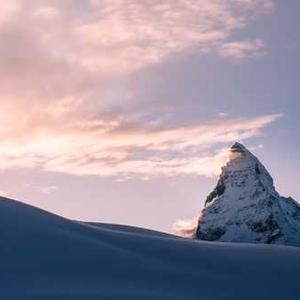

In [10]:
#Image input
import requests
from IPython.display import Image
image_url = "https://picsum.photos/seed/picsum/300/300"
content = requests.get(image_url).content
Image(content)

In [11]:
from langchain_core.messages import HumanMessage
llm = ChatGoogleGenerativeAI(model="gemini-pro-vision")
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "What's in this image?",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": image_url},
    ]
)
llm.invoke([message])

AIMessage(content=' The image contains a snow-capped mountain peak at sunset.')

In [9]:
#Streaming and batching
for chunk in llm.stream("Introduce yourself briefly"):
    print(chunk.content)
    print("---")

Hello! I am Gemini, a multimodal AI model, developed by Google. I
---
 am designed to assist and inform users to the best of my abilities. While I may not have personal experiences or emotions like humans, I am constantly learning and striving
---
 to be helpful and informative. Is there anything specific you would like to know or need assistance with today?
---
